In [59]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score
import numpy as np
x, y = make_moons(n_samples=1000, noise=0.5, random_state=10)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 10, test_size = 0.5)


In [57]:
grid_searcher = GridSearchCV(
    KNeighborsClassifier(),
    param_grid = {
        'n_neighbors': range(1, 21),
    },
    cv = KFold(n_splits = 5, random_state = 10, shuffle=True)
)
grid_searcher.fit(X_train, y_train)
predictions = grid_searcher.predict(X_test)
ac = accuracy_score(predictions,y_test)
print(ac)

0.8


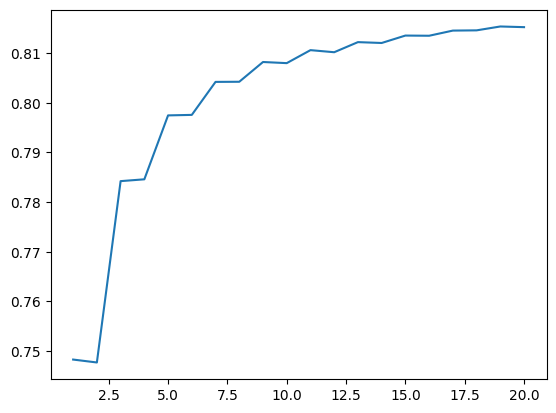

In [58]:
def train_grid_search(X, y):
    grid_searcher = GridSearchCV(
    KNeighborsClassifier(),
    param_grid = {
        'n_neighbors': range(1, 21),
    },
    cv = 5
)
    grid_searcher.fit(X, y)
    return grid_searcher.cv_results_['mean_test_score']

mean_test_scores = []
for i in range(1000):
    X, y = make_moons(n_samples=1000, noise=0.5)
    mean_test_score = train_grid_search(X, y)
    mean_test_scores.append(mean_test_score)

mean_test_scores = np.array(mean_test_scores)
plt.plot(np.arange(1, 21), np.mean(mean_test_scores, axis=0))

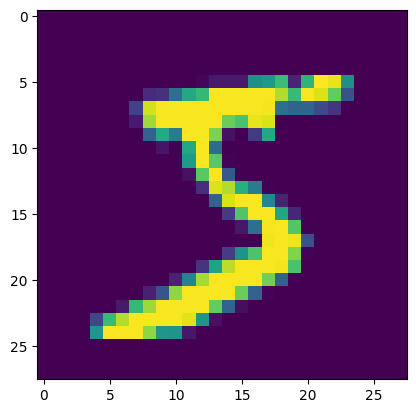

In [61]:
from mnist import MNIST

mndata = MNIST('./dir_with_mnist_data_files')
images, labels = mndata.load_training()
images, labels = np.array(images), np.array(labels)
plt.imshow(images[0].reshape(28, 28))

In [64]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, random_state=10, test_size=0.2)
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
ac = accuracy_score(y_test, predictions)
print(ac)

0.956
